# Задание по практике 2

In [72]:
import pandas as pd
import numpy as np
import plotly.express as plt
import math

df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

Категориальная переменная - Sex (Y)

Переменная для анализа - RestingBP (X)

In [73]:
describe = df['RestingBP'].describe()
print(describe)

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64


In [74]:
mean = df.groupby(['Sex']).agg({'RestingBP': ['mean']}) 
mean

,RestingBP
,mean
Sex,
F,132.212435
M,132.445517


In [75]:
median = df.groupby(['Sex']).agg({'RestingBP': ['median']}) #устойчива к выбросам
median

,RestingBP
,median
Sex,
F,130.0
M,130.0


In [76]:
mode = df.groupby(['Sex']).agg({'RestingBP': [pd.Series.mode]}) #наиболее частых значения в категориях
mode

,RestingBP
,mode
Sex,
F,120
M,120


In [77]:
min = df.groupby(['Sex']).agg({'RestingBP': ['min']})
min

,RestingBP
,min
Sex,
F,94
M,0


In [78]:
max = df.groupby(['Sex']).agg({'RestingBP': ['max']})
max

,RestingBP
,max
Sex,
F,200
M,200


In [79]:
std = df.groupby(['Sex']).agg({'RestingBP': [np.std]}) #отклонение
std

,RestingBP
,std
Sex,
F,19.392638
M,18.286739


Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [80]:
q1 = df.groupby(['Sex'])['RestingBP'].quantile(0.25)
q1

Sex
F    120.0
M    120.0
Name: RestingBP, dtype: float64

In [81]:
q2 = df.groupby(['Sex'])['RestingBP'].quantile(0.5)
q2

Sex
F    130.0
M    130.0
Name: RestingBP, dtype: float64

In [82]:
q3 = df.groupby(['Sex'])['RestingBP'].quantile(0.75)
q3

Sex
F    140.0
M    140.0
Name: RestingBP, dtype: float64

In [83]:
iqr = q3 - q1
print(iqr)

Sex
F    20.0
M    20.0
Name: RestingBP, dtype: float64


Какие выводы можно сделать исходя из полученных статистических данных?

**Ответ здесь**

```
Можно сделать следующие выводы: 
1. Среднее значение давления в состоянии покоя у женщин ниже, чем у мужчин, хотя, у мужчин диапазон минимального и максимального давления шире
2. Стандартное отклонение сильно различается от средних значений, что говорит о большом разбросе давления в состоянии покоя как у женщин, так и у мужчин
```


# Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

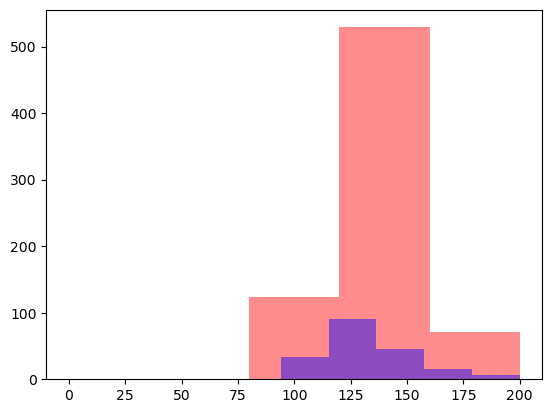

In [84]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.hist(df[df.Sex == 'M']['RestingBP'], bins=5, alpha=0.45, color='red') 
plt.hist(df[df.Sex == 'F']['RestingBP'], bins=5, alpha=0.45, color='blue') 
  
plt.show() 

**Вывод**

У мужчин наблюдается большее количество значений давления в состоянии покоя в более высоком диапазоне значений по сравнению с женщинами. У женщин преобладают значения давления в состоянии покоя в более низком диапазоне значений. 

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

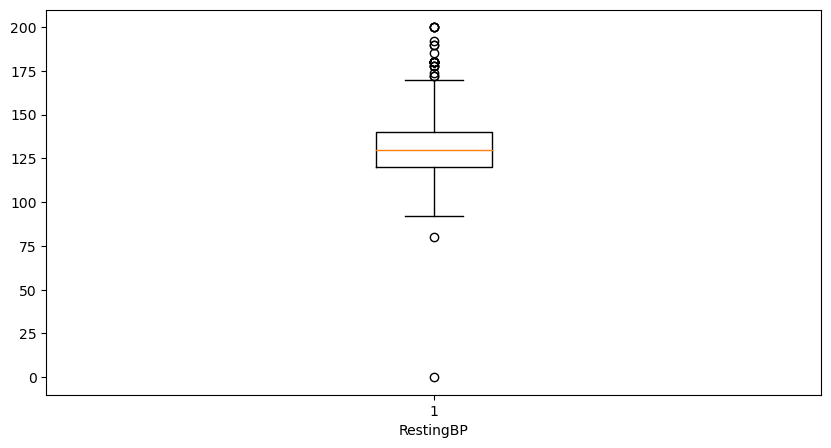

In [85]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.boxplot(df['RestingBP'])
plt.xlabel('RestingBP')
plt.show()

**Вывод**

Верхний ус ящика заканчивается примерно на уровне 145, что указывает на то, что 75% значений RestingBP не превышают этот показатель. Нижний "ус" ящика заканчивается примерно на уровне 120, что указывает на то, что 25% значений RestingBP не превышают этот показатель.

<Axes: xlabel='Sex', ylabel='RestingBP'>

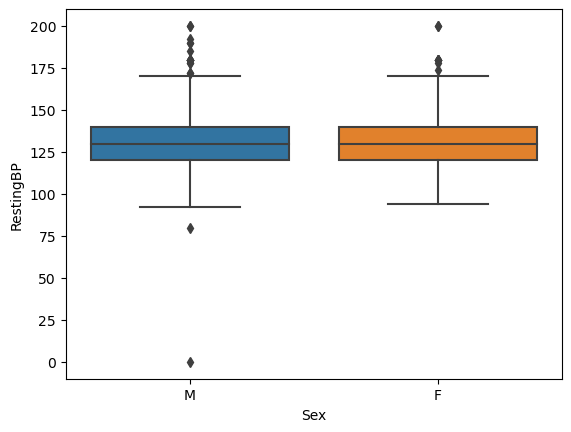

In [86]:
import seaborn as sns

sns.boxplot(x=df['Sex'], y=df['RestingBP'])

**Вывод**

На графике можно увидеть наличие потенциальных выбросов и экстремальных значений RestingBP в распределении для каждой категории пола.

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

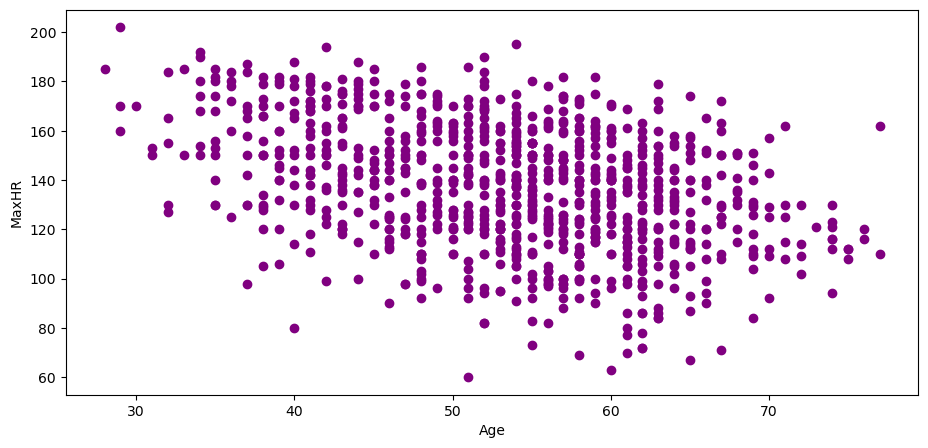

In [87]:
plt.figure(figsize=(11, 5))
plt.scatter(df['Age'], df['MaxHR'], color='purple')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.show()

**Ответ здесь**

На данном графике отображается зависимость максимального давления (MaxHR) от возраста (Age). Из графика видно, что есть положительная корреляция между возрастом и максимальным давлением. В целом, чем моложе человек, тем выше его максимальное давление. Однако, также можно заметить, что есть достаточно большой разброс значений для каждого возраста. Это может свидетельствовать о том, что максимальное давление у людей может зависеть не только от возраста, но и от других факторов.

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<Axes: >

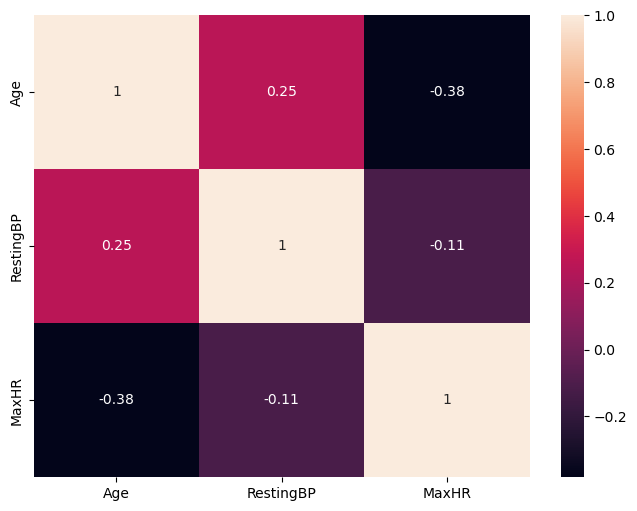

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисление корреляционной матрицы
corr_matrix = df[['Age', 'RestingBP', 'MaxHR']].corr()

# Визуализация корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)

Какие выводы можно сделать на основе графиков и матрицы корреляции?

**Ответ здесь**

Изучив матрицу корреляции можно сказать, что связь между данными довольно слабая и умеренная. Но несмотря на это, наиболее сильную корреляцию имеют MaxHR-Age (таким образом можно сделать выводы, что с возрастом человека значение максимального давления уменьшается). А слабую связь представляют данные RestingBP-Age и RestingBP-MaxHR. 